**Multiarmed Bandits: epsilon-Greedy versus Greedy algorithms**

In this notebook, we use OpenAI Gym to implement epsilon-Greedy and Greedy algorithms

In [1]:
import gym

Unfortunatley, Gym does not provide a bandit environment so we need to import it, lets install one with the command below:

In [2]:
!git clone https://github.com/JKCooper2/gym-bandits.git > /dev/null 2>&1
!pip install /content/gym-bandits/. > /dev/null 2>&1

Let's import needed packages

In [3]:
import gym_bandits
import numpy as np
import matplotlib.pyplot as plt
import random

Define the epsilon-Greedy actions (Note: if epsilon=0 it corresponds to the Greedy action)

In [4]:
def get_action(Q, e):
    if random.random() < e:
        return random.randint(0, 9)
    else:
        return np.argmax(Q)

We want to compare the Average Reward over repeated experiments for different values of epsilon.

We define a function that compute the average of obtained reward over repeated experiments.

In [5]:
def average(tot_rewards):
    avg = []
    for i in range(len(tot_rewards[0])):
        temp = 0
        for j in range(len(tot_rewards)):
            temp += tot_rewards[j][i]
        temp /= len(tot_rewards)
        avg.append(temp)
    return avg

Main code: define an Environment for 10-armed Bandit whose rewards are Gaussian distributed with standard deviation = 1 and a mean drawn from a normal distribution (0,1). Same as Barto &

In [9]:
k = 10  # Number of actions (arms)
iter = 1000 # Number of steps
repeat = 2000 # Number of repetitions
e0 = []  # Results for Greedy algotihtm (epsilon=0)
e001 = [] # Results for epsilon = 0.01
e01 = [] # Results for epsilon = 0.1
e02 = [] # Results for epsilon = 0.2
e03 = [] # Results for epsilon = 0.2

env = gym.make("BanditTenArmedGaussian-v0") # define Environment

Run the Greedy algorithm (epsilon = 0) several times to average the results

In [10]:
env.reset()
tot_rewards = []
e = 0
for _ in range(repeat):
    Q = np.zeros(shape=(k))
    N = np.zeros(shape=(k))
    rewards = []
    for i in range(iter):
        action = get_action(Q, e)
        state, reward, done, info = env.step(action)
        rewards.append(reward)
        N[action] += 1
        Q[action] = Q[action] +  1/N[action] * (reward - Q[action])
    env.reset()
    tot_rewards.append(rewards)

e0 = average(tot_rewards)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


Run the epsilon-Greedy algorithm with epsilon = 0.01 several times to average the results

In [11]:
env.reset()
tot_rewards = []
e = 0.01
for _ in range(repeat):
    Q = np.zeros(shape=(k))
    N = np.zeros(shape=(k))
    rewards = []
    for i in range(iter):
        action = get_action(Q, e)
        state, reward, done, info = env.step(action)
        rewards.append(reward)
        N[action] += 1
        Q[action] = Q[action] +  1/N[action] * (reward - Q[action])
    env.reset()
    tot_rewards.append(rewards)

e001 = average(tot_rewards)

Run the epsilon-Greedy algorithm with epsilon = 0.1 several times to average the results

In [12]:
env.reset()
tot_rewards = []
e = 0.1
for _ in range(repeat):
    Q = np.zeros(shape=(k))
    N = np.zeros(shape=(k))
    rewards = []
    for i in range(iter):
        action = get_action(Q, e)
        state, reward, done, info = env.step(action)
        rewards.append(reward)
        N[action] += 1
        Q[action] = Q[action] +  1/N[action] * (reward - Q[action])
    env.reset()
    tot_rewards.append(rewards)

e01 = average(tot_rewards)

Run the epsilon-Greedy algorithm with epsilon = 0.2 several times to average the results

In [18]:
env.reset()
tot_rewards = []
e = 0.2
for _ in range(repeat):
    Q = np.zeros(shape=(k))
    N = np.zeros(shape=(k))
    rewards = []
    for i in range(iter):
        action = get_action(Q, e)
        state, reward, done, info = env.step(action)
        rewards.append(reward)
        N[action] += 1
        Q[action] = Q[action] +  1/N[action] * (reward - Q[action])
    env.reset()
    tot_rewards.append(rewards)

e02 = average(tot_rewards)

Finally, we plot the results to compare the Greedy algorithm against the epsilon-Greedy algorithm

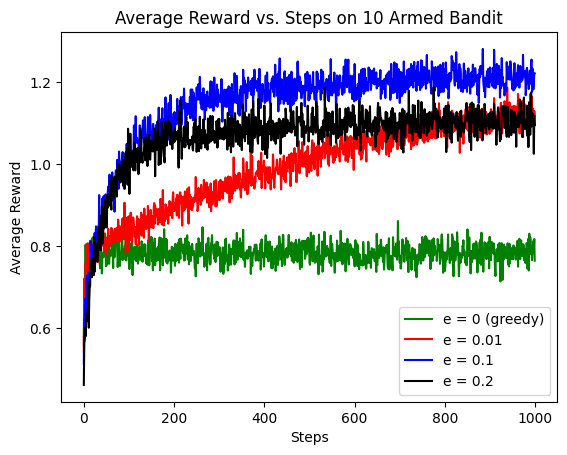

In [20]:
plt.plot(e0, color='green', label='e = 0 (greedy)')
plt.plot(e001, color='red', label='e = 0.01')
plt.plot(e01, color='blue', label='e = 0.1')
plt.plot(e02, color='black', label='e = 0.2')
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward vs. Steps on 10 Armed Bandit")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid syntax (<ipython-input-22-bf846664a15d>, line 1)